In [2]:
import numpy
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)
# 导入数据集
(x_img_train,y_label_train),(x_img_test, y_label_test)=cifar10.load_data()#？？？不太懂
print('train:',len(x_img_train))#为什么是5000
print('test :',len(x_img_test))#为什么是10000
print('train_image :',x_img_train.shape)#5000张，32*32，三通道
print('train_label :',y_label_train.shape)#5000个标签
print('test_image :',x_img_test.shape)
print('test_label :',y_label_test.shape)


train: 50000
test : 10000
train_image : (50000, 32, 32, 3)
train_label : (50000, 1)
test_image : (10000, 32, 32, 3)
test_label : (10000, 1)


In [3]:
#查看像素
print(x_img_test[0])


[[[158 112  49]
  [159 111  47]
  [165 116  51]
  ...
  [137  95  36]
  [126  91  36]
  [116  85  33]]

 [[152 112  51]
  [151 110  40]
  [159 114  45]
  ...
  [136  95  31]
  [125  91  32]
  [119  88  34]]

 [[151 110  47]
  [151 109  33]
  [158 111  36]
  ...
  [139  98  34]
  [130  95  34]
  [120  89  33]]

 ...

 [[ 68 124 177]
  [ 42 100 148]
  [ 31  88 137]
  ...
  [ 38  97 146]
  [ 13  64 108]
  [ 40  85 127]]

 [[ 61 116 168]
  [ 49 102 148]
  [ 35  85 132]
  ...
  [ 26  82 130]
  [ 29  82 126]
  [ 20  64 107]]

 [[ 54 107 160]
  [ 56 105 149]
  [ 45  89 132]
  ...
  [ 24  77 124]
  [ 34  84 129]
  [ 21  67 110]]]


In [4]:
# 可视化部分训练集
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14) # 控制图片大小
    if num>25: num=25  #最多显示25张
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
        title=str(i)+','+label_dict[labels[i][0]]# i-th张图片对应的类别
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);
        ax.set_yticks([])        
        idx+=1 
    plt.savefig('1.png')
    plt.show()


In [5]:
print(y_label_train[0])
print(y_label_train[0][0])

[6]
6


In [6]:
print(x_img_train[0][0][0]) #（50000，32，32，3）
#标准化图片
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0
print(x_img_train_normalize[0][0][0])


[59 62 63]
[0.23137255 0.24313726 0.24705882]


In [7]:
#独热编码one hot encoding
print(y_label_train.shape)

print(y_label_train[:5])

(50000, 1)
[[6]
 [9]
 [9]
 [4]
 [1]]


In [8]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
print(y_label_train_OneHot.shape)
print(y_label_train_OneHot[:10])


(50000, 10)
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


![title](channel.png)

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
# 搭面包架子
model = Sequential()#建立模型
# 加面包：卷积层1 和 池化层1
'''
32个卷积核，每个卷积核3*3

'''
model.add(Conv2D(filters=32,kernel_size=(3,3),#3*3的卷积核
                 input_shape=(32, 32,3), 
                 activation='relu', #relu函数
                 padding='same'))#padding

'''
不同的padding方式,
VALID是采用丢弃的方式,
比如上述的input_width=13,
只允许滑动2次,
多余的元素全部丢掉


SAME的方式,
采用的是补全的方式,
对于上述的情况,
允许滑动3次,
但是需要补3个元素,
左奇右偶,在左边补一个0,
右边补2个0
'''
model.add(Dropout(rate=0.25))#丢弃，yes

model.add(MaxPooling2D(pool_size=(2, 2))) # 16* 16
# 加面包：卷积层2 和 池化层2
'''

64个卷积核

'''
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(Dropout(0.25))
'''
dropout 是指在深度学习网络的训练过程中，
按照一定的概率将一部分神经网络单元暂时从网络中丢弃，
相当于从原始的网络中找到一个更瘦的网络
'''
model.add(MaxPooling2D(pool_size=(2, 2))) # 8 * 8
#Step3	建立神經網路(平坦層、隱藏層、輸出層)
model.add(Flatten()) # FC1,64个8*8转化为1维向量
'''

Flatten层用来将输入“压平”，
即把多维的输入一维化，
常用在从卷积层到全连接层的过渡。
Flatten不影响batch的大小。



'''
model.add(Dropout(rate=0.25))
#丢弃
model.add(Dense(1024, activation='relu')) # FC1 1024
#output shape （none，1024）
#64*8*8！=1024
'''
FullyConnected 1
输4096，输出 1024
4096*1024 + 1024 = 4195328
bingo!!!
''' 



'''
Dense就是常用的全连接层，
所实现的运算是output = activation(dot(input, kernel)+bias)。
其中activation是逐元素计算的激活函数，
kernel是本层的权值矩阵，
bias为偏置向量，
只有当use_bias=True才会添加
'''
model.add(Dropout(rate=0.25))
model.add(Dense(10, activation='softmax')) # Output 10
'''
FC2（output layer）
输入
1024，输出10
1024*10+10 = 10250

'''
print(model.summary())
'''
参数计算：
con1 滤波器大小 3*3，输入3通道，32个滤波器，输出32通道
3 × 3 × 3 × 32 + 32 = 896

con2 滤波器大小 3*3，输入32通道，64个滤波器，输出64通道
32 × 3 × 3 × 64 + 64 = 18496

'''


'''
有几个卷积核就可以学习几个特征，就有几个feature map
假设输入数据的格式是[?,28,28,16],卷积核的尺寸是[3,3,16,32]

输入数据的格式的含义是：

？：batchsize

28,28:feature map单个通道的尺寸（高，宽）

16：feature map的通道数

卷积核格式的含义：

3,3：卷积核的高与宽

16：卷积核的通道数

32：卷积核的个数

[3,3,16,32]的含义是指：卷积核的尺寸是3*3*16，宽为3，高为3，通道数为16（对应被卷积的张量的通道数），共有32个卷积核

卷积的过程是：对于单个卷积核，有16个通道，
每个通道的分量分别与对应的被卷积张量的对应通道卷积，
得到16个通道的卷积结果，
然后这16个通道的卷积结果按元素叠加，
生成一个通道的卷积结果，
然后该卷积结果再经过激活函数，
得到最终的卷积结果。
（至此，一个16通道的张量，
经过一个16通道的卷积核后，
得到了一个单通道的张量）                                    

一个卷积核得到一个单通道的张量，共有32个卷积核，可得到32个单通道的张量，最后将这些张量连接起来，得到一个32通道的张量结果。

'''

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

![title](drop.png)

![title](padding.png)

In [26]:
#调用显卡
import os  
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]="0"  

In [27]:
model.compile(loss='categorical_crossentropy',#交叉熵函数
              optimizer='adam', metrics=['accuracy'])

train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=128, verbose=1) 
#fit函数将模型训练nb_epoch轮
'''
性能评估模块提供了一系列用于模型性能评估的函数,
这些函数在模型编译时由metrics关键字设置

shuffle用于将数据打乱
validation_split用于在没有提供验证集的时候，
按一定比例从训练集中取出一部分作为
验证

fit 中的 verbose
verbose：日志显示
verbose = 0 为不在标准输出流输出日志信息
verbose = 1 为输出进度条记录
verbose = 2 为每个epoch输出一行记录
注意： 默认为 1
'''


Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 116s 3ms/step - loss: 1.5036 - acc: 0.4593 - val_loss: 1.2777 - val_acc: 0.5863
Epoch 2/10
40000/40000 [==============================] - 113s 3ms/step - loss: 1.1374 - acc: 0.5955 - val_loss: 1.1111 - val_acc: 0.6363
Epoch 3/10
40000/40000 [==============================] - 125s 3ms/step - loss: 0.9826 - acc: 0.6585 - val_loss: 1.0091 - val_acc: 0.6643
Epoch 4/10
40000/40000 [==============================] - 117s 3ms/step - loss: 0.8772 - acc: 0.6910 - val_loss: 0.9368 - val_acc: 0.6957
Epoch 5/10
40000/40000 [==============================] - 115s 3ms/step - loss: 0.7887 - acc: 0.7224 - val_loss: 0.8911 - val_acc: 0.7005
Epoch 6/10
40000/40000 [==============================] - 113s 3ms/step - loss: 0.7010 - acc: 0.7535 - val_loss: 0.8384 - val_acc: 0.7200
Epoch 7/10
40000/40000 [==============================] - 114s 3ms/step - loss: 0.6181 - acc: 0.7828 - val_loss: 0.8194 - 

In [10]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig("1.png")
    plt.show()
show_train_history('acc','val_acc')

NameError: name 'train_history' is not defined

In [9]:
show_train_history('loss','val_loss')

NameError: name 'show_train_history' is not defined

In [31]:
#模型评估：
print(model.metrics_names)
scores = model.evaluate(x_img_test_normalize, 
                        y_label_test_OneHot, verbose=0)
print(scores)
print(scores[1])
'''
evaluate(self, x, y, batch_size=32, verbose=1, sample_weight=None)

batch_size：整数，
指定进行梯度下降时每个batch包含的样本数。
训练时一个batch的样本会被计算一次梯度下降，
使目标函数优化一步。

epochs：整数，
训练终止时的epoch值，
训练将在达到该epoch值时停止，
当没有设置initial_epoch时，
它就是训练的总轮数，
否则训练的总轮数为epochs - inital_epoch

verbose：日志显示，
0为不在标准输出流输出日志信息，
1为输出进度条记录，2为每个epoch输出一行记录
'''

['loss', 'acc']
[0.7548947960853577, 0.7376]
0.7376


In [33]:
prediction=model.predict_classes(x_img_test_normalize)
prediction[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=int64)

In [34]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()


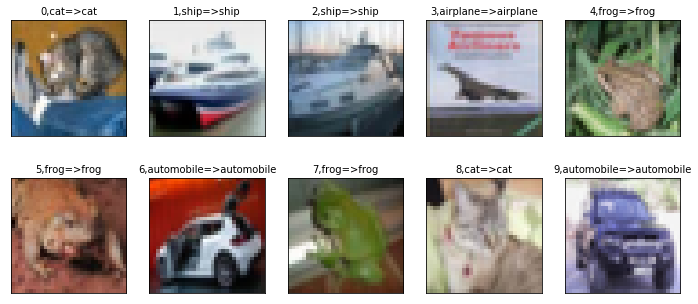

In [35]:
plot_images_labels_prediction(x_img_test,y_label_test,prediction,0,10)

In [36]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}
def show_Predicted_Probability(y,prediction,x_img,Predicted_Probability,i):
    print('label:',label_dict[y[i][0]],'predict:',label_dict[prediction[i]])
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x_img_test[i],(32, 32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+' Probability:%1.9f'%(Predicted_Probability[i][j]))
